# Political Donor Prediction Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
#from empiricaldist import Cdf
from sklearn.preprocessing import LabelEncoder #Transform categorical features
from pandas_profiling import ProfileReport

In [2]:
donor_file = ('/Users/mehrunisaqayyum/Downloads/gp_test_data.csv')
df = pd.read_csv(donor_file)
df

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,101,Rural,NaN,M,0.0,0.0,NaN,5370,6.0,90000.0,NaN,19.3,51.6,5.0,7.0,49.8,0,NaN
1,102,Suburban,1946.0,F,1.0,1.0,NaN,5151,10.0,44000.0,1.0,69.4,91.8,8.0,5.0,2.4,1,15.0
2,103,Suburban,1995.0,NaN,1.0,NaN,NaN,4144,NaN,NaN,1.0,73.0,47.4,NaN,NaN,47.3,0,NaN
3,104,Suburban,1979.0,NaN,1.0,1.0,NaN,4440,8.0,62000.0,1.0,29.3,88.2,1.0,7.0,98.1,1,63.0
4,105,Suburban,1947.0,NaN,0.0,1.0,NaN,5064,NaN,47000.0,1.0,41.0,73.4,9.0,NaN,75.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20096,Suburban,1942.0,M,1.0,1.0,NaN,4310,10.0,27000.0,1.0,10.3,22.4,10.0,2.0,67.9,0,NaN
19996,20097,Suburban,1981.0,M,1.0,1.0,NaN,5152,9.0,53000.0,1.0,15.1,2.2,3.0,4.0,20.0,0,NaN
19997,20098,Rural,1917.0,F,0.0,1.0,NaN,3758,NaN,11000.0,1.0,23.8,1.6,11.0,1.0,78.9,0,NaN
19998,20099,Rural,1958.0,F,0.0,NaN,NaN,4440,NaN,NaN,1.0,31.4,38.6,NaN,NaN,39.5,0,NaN


In [3]:
#Import empiricaldist import Cdf
!pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/anaconda3/lib/python3.7/site-packages (0.11.1)


In [4]:
df.head(10)

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,101,Rural,NaN,M,0.0,0.0,NaN,5370,6.0,90000.0,NaN,19.3,51.6,5.0,7.0,49.8,0,NaN
1,102,Suburban,1946.0,F,1.0,1.0,NaN,5151,10.0,44000.0,1.0,69.4,91.8,8.0,5.0,2.4,1,15.0
2,103,Suburban,1995.0,NaN,1.0,NaN,NaN,4144,NaN,NaN,1.0,73.0,47.4,NaN,NaN,47.3,0,NaN
3,104,Suburban,1979.0,NaN,1.0,1.0,NaN,4440,8.0,62000.0,1.0,29.3,88.2,1.0,7.0,98.1,1,63.0
4,105,Suburban,1947.0,NaN,0.0,1.0,NaN,5064,NaN,47000.0,1.0,41.0,73.4,9.0,NaN,75.0,0,NaN
5,106,Rural,1985.0,F,1.0,1.0,NaN,3906,NaN,87000.0,1.0,29.5,57.3,4.0,NaN,73.7,0,NaN
6,107,Urban,1958.0,M,0.0,1.0,NaN,3216,3.0,115000.0,1.0,77.4,83.0,2.0,10.0,98.2,1,32.0
7,108,Suburban,1979.0,M,1.0,1.0,NaN,5249,6.0,109000.0,1.0,40.7,86.1,4.0,7.0,1.4,1,74.0
8,109,Suburban,1979.0,NaN,0.0,NaN,NaN,3611,NaN,NaN,1.0,54.8,58.7,NaN,NaN,85.6,0,NaN
9,110,Urban,1970.0,M,1.0,NaN,NaN,3628,NaN,61000.0,1.0,52.0,90.9,7.0,NaN,91.9,0,NaN


In [5]:
!pip install pandas-profiling[notebook]
#profile = ProfileReport(df)

In [6]:
len(df)

20000

## Exploratory Data Analysis 
Count the number of people who have a modeled partisan score above 80 (meaning they are at least 80% likely to support Democratic candidates) and a modeled turnout score above 70 (meaning they are at least 70% likely to vote in the 2018 midterm election.
* We have 20,000 donor records in this dataset.


In [7]:
# Note the data types for each coolumn for the 17 variables included
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   voterID                     20000 non-null  int64  
 1   Urbanicity                  19997 non-null  object 
 2   Date_of_birth               15203 non-null  float64
 3   Gender                      15382 non-null  object 
 4   Married                     19793 non-null  float64
 5   Homeowner                   11561 non-null  float64
 6   Has_children                1141 non-null   float64
 7   Zipcode                     20000 non-null  object 
 8   Modeled_charitable_giving   13549 non-null  float64
 9   Household_income            16913 non-null  float64
 10  Unaffiliated_voter          15218 non-null  float64
 11  Modeled_activist_score      19591 non-null  float64
 12  Modeled_turnout_score       20000 non-null  float64
 13  Discretionary_income_level  169

In [8]:
df.columns

Index(['voterID', 'Urbanicity', 'Date_of_birth', 'Gender', 'Married',
       'Homeowner', 'Has_children', 'Zipcode', 'Modeled_charitable_giving',
       'Household_income', 'Unaffiliated_voter', 'Modeled_activist_score',
       'Modeled_turnout_score', 'Discretionary_income_level', 'Nonsaver_level',
       'Modeled_partisan_score', 'Survey_Respondent',
       'Liberal_cause_donation'],
      dtype='object')

### Observations: 
String variables include: (1) 'Urbanicity', (2) 'Gender', which will be categorical, and (3) Zipcode, which could be converted to a numeric type or recategorized to serve as an ordinal variable if we want to derive state/location information and regroup.

Our target variable will be 'Liberal_cause_donation', a scoring column for propensity to donate, according to Question 3.

In [9]:
#Run a Value Counts on 'potential_donors' to highlight some descriptive statistics regarding counts per column
df.value_counts()

voterID  Urbanicity  Date_of_birth  Gender  Married  Homeowner  Has_children  Zipcode  Modeled_charitable_giving  Household_income  Unaffiliated_voter  Modeled_activist_score  Modeled_turnout_score  Discretionary_income_level  Nonsaver_level  Modeled_partisan_score  Survey_Respondent  Liberal_cause_donation
5037     Suburban    1961.0         F       0.0      1.0        1.0           5011     9.0                        39000.0           1.0                 70.0                    93.7                   6.0                         5.0             97.6                    1                  33.0                      1
1791     Suburban    1956.0         M       1.0      1.0        1.0           5011     7.0                        74000.0           1.0                 54.0                    84.9                   5.0                         8.0             7.4                     1                  36.0                      1
2083     Rural       1959.0         M       1.0      1.0       

In [10]:
#Identify the size of potential donors and their demographic info using describe method on 'potential_donors' to highlight some descriptive statistics regarding counts per column
df.describe()

,voterID,Date_of_birth,Married,Homeowner,Has_children,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
count,20000.000000,15203.000000,19793.000000,11561.000000,1141.0,13549.000000,1.691300e+04,15218.0,19591.000000,20000.00000,16913.00000,14377.000000,20000.000000,20000.000000,3098.000000
mean,10100.500000,1967.944616,0.415248,0.891013,1.0,6.845376,6.418838e+04,1.0,38.211373,56.24909,6.49258,5.476664,54.503425,0.154900,55.851517
std,5773.647028,18.556398,0.492777,0.311637,0.0,2.658846,4.903734e+04,0.0,20.599557,28.25587,3.21626,2.626865,34.120779,0.361818,30.590168
min,101.000000,1903.000000,0.000000,0.000000,1.0,1.000000,5.000000e+03,1.0,6.200000,0.20000,1.00000,1.000000,0.200000,0.000000,1.000000
25%,5100.750000,1954.000000,0.000000,1.000000,1.0,5.000000,4.200000e+04,1.0,21.200000,36.80000,4.00000,3.000000,23.500000,0.000000,29.000000
50%,10100.500000,1968.000000,0.000000,1.000000,1.0,7.000000,5.900000e+04,1.0,33.300000,52.10000,6.00000,5.000000,58.300000,0.000000,56.000000
75%,15100.250000,1984.000000,1.000000,1.000000,1.0,9.000000,7.800000e+04,1.0,53.000000,84.60000,9.00000,8.000000,87.800000,0.000000,84.000000
max,20100.000000,2002.000000,1.000000,1.000000,1.0,10.000000,1.997000e+06,1.0,92.500000,98.60000,11.00000,10.000000,99.500000,1.000000,100.000000


In [17]:
#What's the null value situation?
df.isnull().sum()

voterID                           0
Urbanicity                        3
Date_of_birth                  4797
Gender                         4618
Married                         207
Homeowner                      8439
Has_children                  18859
Zipcode                           0
Modeled_charitable_giving      6451
Household_income               3087
Unaffiliated_voter             4782
Modeled_activist_score          409
Modeled_turnout_score             0
Discretionary_income_level     3087
Nonsaver_level                 5623
Modeled_partisan_score            0
Survey_Respondent                 0
Liberal_cause_donation        16902
dtype: int64

### Observations: 
Based on the count, we see that we havae 20K potential donors. Age-wise: the youngest donor was born in 2002. The oldest donor was born in 1903. The median age of our potential donors is: 53 (born in 1968).

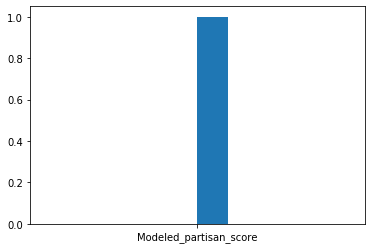

In [11]:
#Find voters who earned: 'Modeled_partisan_score' of >80%  AND 'Modeled_turnout_score' of > 70%
#Use Cummulative Distribution Function to represent all between 81% and 100% score
##Sort by partisan score by using sort_values, ascending=True

plt.hist('Modeled_partisan_score')

# Show histogram
plt.show()

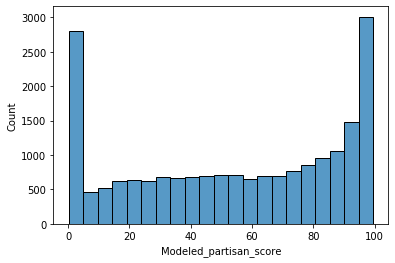

In [12]:
# Show univariate counts across 2 target scores ~stat{“count”, “frequency”, “density”, “probability”} 
#Aggregate statistic to compute in each bin. And count shows the number of observation Make sure partisan score is along the x-axis Specify 'Modeled_turnout_score' as the column to create individual graphics for

sns.histplot(data=df, x="Modeled_partisan_score")
plt.show()

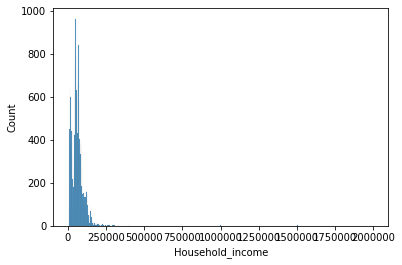

In [13]:
#distribution of income
sns.histplot(data=df, x="Household_income")
plt.show()

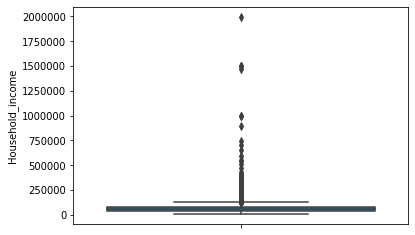

In [14]:
sns.boxplot(data=df, y="Household_income")
plt.show()

In [15]:
df['Household_income'].describe()

count    1.691300e+04
mean     6.418838e+04
std      4.903734e+04
min      5.000000e+03
25%      4.200000e+04
50%      5.900000e+04
75%      7.800000e+04
max      1.997000e+06
Name: Household_income, dtype: float64

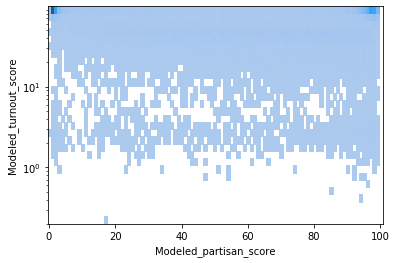

In [16]:
sns.histplot(data=df, x="Modeled_partisan_score", y="Modeled_turnout_score",
    bins=30, discrete=(True, False), log_scale=(False, True),)

In [23]:
#Transform 'Urbanicity' and 'Gender' features
#Debug mixed type values for 'object' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].astype(str))

In [24]:
df['Urbanicity'] = le.fit_transform(df['Urbanicity'].astype(str))

In [25]:
#Create new df that applies label encoder across all
donors_encoded = df.apply(le.fit_transform)
#Check for encoding on 'Gender'
donors_encoded

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,0,0,4885,1,0,0,9152,1568,5,85,4782,126,512,4,6,496,0,2211
1,1,1,32,0,1,1,12390,1412,9,39,0,627,914,7,4,22,1,14
2,2,1,81,2,1,780,12389,811,1452,1212,0,663,470,56,532,471,0,11358
3,3,1,65,2,1,1,12388,985,7,57,0,226,878,0,6,979,1,62
4,4,1,33,2,0,1,12387,1355,1459,42,0,343,730,8,536,748,0,11359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,28,1,1,1,2970,917,9,22,0,36,220,9,1,677,0,5738
19996,19996,1,67,1,1,1,2998,1413,8,48,0,84,19,2,3,198,0,5739
19997,19997,0,3,0,0,1,3015,514,1450,6,0,171,13,10,0,787,0,5740
19998,19998,0,44,0,0,3553,15742,985,3176,1446,0,247,382,1785,3284,393,0,12910


## Select Features for Model

In [51]:
#What's the number of donors who score more 80 in Partisan score AND have a turnout score >70
potential_donors_70_turnout = donors_encoded[donors_encoded['Modeled_turnout_score']>70]
potential_donors_70_turnout

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,0,0,4885,1,0,0,9152,1568,5,85,4782,126,512,4,6,496,0,2211
1,1,1,32,0,1,1,12390,1412,9,39,0,627,914,7,4,22,1,14
2,2,1,81,2,1,780,12389,811,1452,1212,0,663,470,56,532,471,0,11358
3,3,1,65,2,1,1,12388,985,7,57,0,226,878,0,6,979,1,62
4,4,1,33,2,0,1,12387,1355,1459,42,0,343,730,8,536,748,0,11359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,19993,1,70,1,1,1,2983,1047,8,61,0,152,246,4,2,891,0,5736
19994,19994,2,24,0,0,1,0,210,4,61,0,637,853,8,4,986,0,5737
19995,19995,1,28,1,1,1,2970,917,9,22,0,36,220,9,1,677,0,5738
19998,19998,0,44,0,0,3553,15742,985,3176,1446,0,247,382,1785,3284,393,0,12910


### Observation
Potential donors with a model Turnout Score of 70 or higher are 18,755 voters.

In [52]:
score_more_80_partisan = donors_encoded[donors_encoded["Modeled_partisan_score"] > 80]
score_more_80_partisan

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,0,0,4885,1,0,0,9152,1568,5,85,4782,126,512,4,6,496,0,2211
2,2,1,81,2,1,780,12389,811,1452,1212,0,663,470,56,532,471,0,11358
3,3,1,65,2,1,1,12388,985,7,57,0,226,878,0,6,979,1,62
4,4,1,33,2,0,1,12387,1355,1459,42,0,343,730,8,536,748,0,11359
5,5,0,71,0,1,1,12386,591,1460,82,0,228,569,3,537,735,0,11360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,28,1,1,1,2970,917,9,22,0,36,220,9,1,677,0,5738
19996,19996,1,67,1,1,1,2998,1413,8,48,0,84,19,2,3,198,0,5739
19997,19997,0,3,0,0,1,3015,514,1450,6,0,171,13,10,0,787,0,5740
19998,19998,0,44,0,0,3553,15742,985,3176,1446,0,247,382,1785,3284,393,0,12910


### Observation
Potential donors with a Partisan Score of 80 or higher are 16,862 voters.

What is the overlap of these higher scoring groups in both categories?
* 15,749 potential donors scored above 80 in partisan AND show a 'Turn Out' score of 70.

In [54]:
turnout_70_partisan_score_80 = potential_donors_70_turnout[potential_donors_70_turnout['Modeled_partisan_score']>80]
turnout_70_partisan_score_80 

,voterID,Urbanicity,Date_of_birth,Gender,Married,Homeowner,Has_children,Zipcode,Modeled_charitable_giving,Household_income,Unaffiliated_voter,Modeled_activist_score,Modeled_turnout_score,Discretionary_income_level,Nonsaver_level,Modeled_partisan_score,Survey_Respondent,Liberal_cause_donation
0,0,0,4885,1,0,0,9152,1568,5,85,4782,126,512,4,6,496,0,2211
2,2,1,81,2,1,780,12389,811,1452,1212,0,663,470,56,532,471,0,11358
3,3,1,65,2,1,1,12388,985,7,57,0,226,878,0,6,979,1,62
4,4,1,33,2,0,1,12387,1355,1459,42,0,343,730,8,536,748,0,11359
5,5,0,71,0,1,1,12386,591,1460,82,0,228,569,3,537,735,0,11360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,19993,1,70,1,1,1,2983,1047,8,61,0,152,246,4,2,891,0,5736
19994,19994,2,24,0,0,1,0,210,4,61,0,637,853,8,4,986,0,5737
19995,19995,1,28,1,1,1,2970,917,9,22,0,36,220,9,1,677,0,5738
19998,19998,0,44,0,0,3553,15742,985,3176,1446,0,247,382,1785,3284,393,0,12910


In [27]:
#Develop a list of features called 'col_names'
col_names = ['Household_income','Homeowner', 'Married', 'Modeled_turnout_score','Modeled_partisan_score', 'Discretionary_income_level'] 

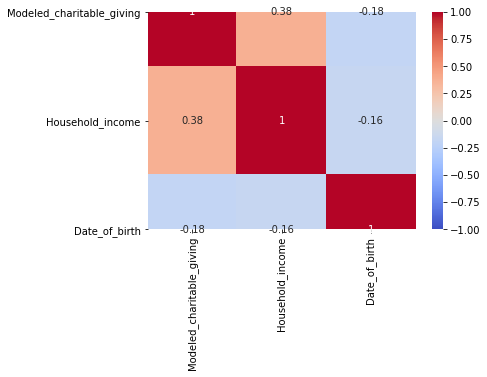

In [28]:
list_of_columns = ['Modeled_charitable_giving', 'Household_income','Date_of_birth']
potential_donors_numeric = donors_encoded[list_of_columns]
sns.heatmap(potential_donors_numeric.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True)

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the missing value features and convert the DataFrame to a NumPy array
#Build prediction model
## Use “Liberal_cause_donation” =  'Household_income' + 'Homeowner' + 'Married' + 'Modeled_turnout_score' + 'Modeled_partisan_score' + 'Discretionary_income_level'


In [30]:
#Didn't eliminate any features
X = donors_encoded.drop(['Liberal_cause_donation'], axis=1)
y = donors_encoded['Liberal_cause_donation']

In [34]:
print(X)

       voterID  Urbanicity  Date_of_birth  Gender  Married  Homeowner  \
0            0           0           4885       1        0          0   
1            1           1             32       0        1          1   
2            2           1             81       2        1        780   
3            3           1             65       2        1          1   
4            4           1             33       2        0          1   
...        ...         ...            ...     ...      ...        ...   
19995    19995           1             28       1        1          1   
19996    19996           1             67       1        1          1   
19997    19997           0              3       0        0          1   
19998    19998           0             44       0        0       3553   
19999    19999           2             33       0        0          1   

       Has_children  Zipcode  Modeled_charitable_giving  Household_income  \
0              9152     1568                  

## Train-Test Split

In [35]:
#Split the data into 70% train and aand 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state=0)

In [36]:
model = LinearRegression()

In [37]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6135763666694285


# Part 2 
## Missing Values

In [42]:
#Impute with mean for target column with missing values, including 'Household_income'
#Create New data set where missing address and is potential_donors_fixed
potential_donors_fixed = donors_encoded.copy()
value_to_replace = donors_encoded['Household_income'].mean()
potential_donors_fixed['Household_income'] = donors_encoded['Household_income'].fillna(value_to_replace)
potential_donors_fixed

for col in ['Household_income', 'Liberal_cause_donation']:
  value_to_replace = donors_encoded[col].mean()
  potential_donors_fixed[col] = potential_donors_fixed[col].fillna(value_to_replace)

In [43]:
#Removed features for X1, y1
#Using data set that fixed missing values to see difference 
#X_2 = donors_encoded.drop(~ col_names)
X1 = potential_donors_fixed.drop(['Liberal_cause_donation'], axis=1)
y1 = potential_donors_fixed['Liberal_cause_donation']

In [44]:
#Split the data into 70% train and aand 30% test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=.30, random_state=0)

In [45]:
model_1 = LinearRegression()

In [46]:
print(X1)

       voterID  Urbanicity  Date_of_birth  Gender  Married  Homeowner  \
0            0           0           4885       1        0          0   
1            1           1             32       0        1          1   
2            2           1             81       2        1        780   
3            3           1             65       2        1          1   
4            4           1             33       2        0          1   
...        ...         ...            ...     ...      ...        ...   
19995    19995           1             28       1        1          1   
19996    19996           1             67       1        1          1   
19997    19997           0              3       0        0          1   
19998    19998           0             44       0        0       3553   
19999    19999           2             33       0        0          1   

       Has_children  Zipcode  Modeled_charitable_giving  Household_income  \
0              9152     1568                  

In [47]:
#Fit the new model
model_1.fit(X1_train, y1_train)

LinearRegression()

In [48]:
model_1 = LinearRegression().fit(X1_train, y1_train)
r_sq = model.score(X1, y1)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6135763666694285


# Questions:
How likely is it that potential donor will donate at least $75 too a liberal cause?

#Need the cdf

In [41]:
from scipy import stats
test=stats.ttest_1samp(donors_encoded['Liberal_cause_donation'], 75)
print(test.pvalue.round(3))

0.0


In [ ]:
#Small, Clean data set with no object types, like 'Zipcode'
#Drop unnecessary column, like 'CustomerID' for easier processing of KMeans clustering
donors_encoded.drop(['Zipcode '], axis=1)